[Day 3 morning **_"exploratory analysis"_**]

**Attribution:**  
* The material in the [Matplotlib](#matplotlib) section is based on "[matplotlib - 2D and 3D plotting in Python](https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)" by **Robert Johansson ** under [CC-BY 3.0](https://creativecommons.org/licenses/by/3.0/).
* The materian in the [Seaborn](#seaborn) section is based on "[Seaborn tutorial: Plotting Functions](https://seaborn.pydata.org/tutorial.html) by **Michael Waskom** under [BSD 3-clause](https://opensource.org/licenses/BSD-3-Clause) license.
* The material in the [Bokeh](#bokeh) section is based on [Bokeh: Bokeh notebooks: Tutorial ](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/tree/master/tutorial/) by **birdsarah**, **jbednar** and **bryevdv** under [BSD 3-clause New](https://github.com/bokeh/bokeh/blob/master/LICENSE.txt) license.

**NOTE:** Some changes have been made.


<a name="top"></a>Exploratory Data Analysis
===

<a name="top"></a>Outline
---

* [Basic plotting with Matplotlib](#matplotlib)
  * [Numerical Variables](#numerical)
  * [Object oriented plotting](#objectoriented)
  * [The basic plot](#basic)
  * [Scatterplots](#scatterplot)
  * [Histograms](#histogram)
  * [Heatmaps](#heatmap)
* [Exercise 01: Matplotlib](#exercise01)
* [Sofisticated plotting with Seaborn](#seaborn)
  * [Jointplot](#jointplot)
  * [Timeseries plot](#tsplot)
  * [Categorical variables](#categorical)
  * [Categorical scatterplots](#categorical scatterplot)
  * [Distributions of observations within categories](#distribution)
  * [Statistical estimation within categories](#estimation)
* [Exercise 02: Seaborn](#exercise02)
* [Interactive plotting with Bokeh](#bokeh)
  * [Basic plotting interface](#bokeh intro)
  * [Handling big data](#big data)
  * [Interactive plotting](#interactive)
* [Exercise 03: Bokeh](#exercise03)

##### Introduction

To investigate data, we often need to visualize it in some way to make it understandable for humans. Often spending an hour or two just _looking_ at the various aspects of a dataset without quantifying much is a worthy investment - we call this _explorative analysis_. That way you get a feeling of what information your dataset holds and what questions would be worthwhile to ask.  

There is not enough time in this course to give you a complete intoduction to Python's main plotting library Matplotlib, let alone the other interesting libraries like Seaborn and Bokeh. That's why we choose an example oriented approach: This lecture will walk you through examples from Data Science usecases and workflows along with the best tools for every visualization technique. We will start with purely numerical data, then come to a mixture of numerical and categorical variables and finally arive at how to visualize truly big datasets.

**Learning goals:** By the end or this lecture you will
* know how to create hiqh quality, reproducible plots using matplotlib
* have an insight into the common visualization techniques for certain usecases like scatterplots, whisker plots, barplots etc.
* have an idea about how to deal with visualization of really big datasets
* know how to create interactive plots

<a name="matplotlib"></a>Basic plotting with Matplotlib
===

<a name="numerical"></a>Numerical variables
---

Many datasets contain multiple numerical variables, and the goal of an analysis is often to relate those variables to each other. Tools for this are
* **Scatterplots** show the response of an observation to a changing parameter
* **Heatmaps** are a way to display the response of a variable to a two-dimensional, gridded parameter space  
* **Histograms** are a way to show distributions of numerical data.
* **Jointplots** are a combination of scatterplots and histograms.
* **Timeseries plots** are a way to visualize one or more timeseries including uncertainty of the observations.

_Numerical_ variables stand in contrast to _categorical_ variables. Categorical variables are variables that can only take one of a limited number of possible values or 'labels'.

[top](#top)

<a name="objectoriented"></a>Object oriented plotting
---

Matplotlib is a 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Detailed control of every element in a figure
* High-quality output in many formats
* Seamless interaction with NumPy arrays

Matplotlib is highly suitable for generating figures for scientific publications with emphasis on transparency and reproducibility:
* All aspects of a figure can be controlled *programmatically*. 
* You can create a script to plot the figure and then regenerate it with updated data or change its appearance. 
* You can make that same script accessible or embed it into a Jupyter notebook to produce an _executable paper_.

To get started, we import the ```matplotlib.pyplot``` module as well as ```numpy```, ```pandas```, ```seaborn``` and ```bokeh``` and tell jupyter to display plots embedded in the notebook: 

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn.apionly as sns
%matplotlib inline

The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global. The real advantage of this approach becomes apparent when more than one figure is created, when a figure contains more than one subplot or when we want to manipulate the objects _on_ the plot after they were created.

Every plot consists of
* a **figure** object that acts as a container/canvas for all other objects in the plot. You can control parameters such as the plot resolution (DPI),  size and layout through the figure object.  

* one or more **axes** objects that hold the objects that are actually visible on the plot (curve, dots, colormap etc.). Axes objects have axis labels, ticks, legends etc. that can be controlled individually.  

**NOTE:** if you are already familiar with the MATLAP plotting API, you can have a look at matplotlib's pylab module where you can find almost identical bindings for plotting functionality. Nevertheless we recommend learning the object oriented approach, because it is much more powerful and will be used throughout the other plotting libraries too.

[top](#top)

<a name="basic"></a>The basic plot
---

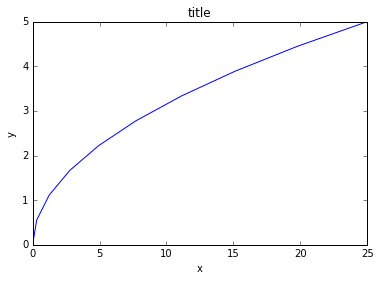

In [4]:
# call the layout manager 'subplots' which returns a figure and an 
# axes object
fig, ax = plt.subplots()

# generate some data to plot
x = np.linspace(0, 5, 10)
y = x ** 2

#set the axis labels and plot title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title')

# plot the actual data
# the plot() function plots the datapoints connected by a line
# by default
ax.plot(y,x)

# NOTE1: to have more than one subplot, simply specify the keyword 
# arguments ncols=x and nrows=y when calling plt.subplots()

# NOTE2: every command returns the 'visuals' it created in the plot
# as objects. plot() for example returns a collection of lines that
# we could choose to modify separately. We use a semicolon to 
# suppress the output to the command line in the future

[top](#top)

<a name="scatterplot"></a>Scatterplots
---

In [6]:
#a dataset of tips given to waitresses and waiters
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


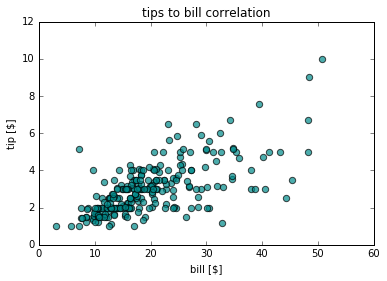

In [7]:
#setup the plot
fig, ax = plt.subplots()
ax.set_title('tips to bill correlation')
ax.set_xlabel('bill [$]')
ax.set_ylabel('tip [$]')

#use the data from the 'tips' dataset to show the correlation
x = np.asarray(tips['total_bill'])
y = np.asarray(tips['tip'])
plt.scatter(x, y, alpha=0.7, s=40, c='DarkCyan');

[top](#top)

<a name="histogram"></a>Histograms
---

We use histograms to visualize distributions of numerical data. Histograms are an estimate of the propability density function of a continuours variable. 
* To plot, we use the **hist()** function along with the one-dimensional data.
* Special care has to go into the ```bins``` argument as different sizes for the bins can change the 'look' of the histogram drastically
* Common keyword arguments are the width of the bins ```rwidth``` and whether or not the histogram should show counts or be normed to show a probability density.

**NOTE:** In this example we use NumPys functionality to generate random numbers. To ensure reproducibility, it is good practice to provide a fixed seed to the random number generator.

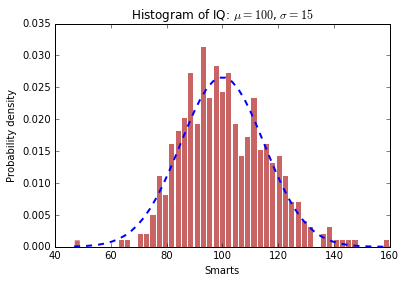

In [8]:
# Fixing random state for reproducibility
seed = 300
np.random.seed(seed)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

fig, ax = plt.subplots()
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# the histogram of the data
n, bins, patches = ax.hist(x, bins=50, rwidth=0.8, \
        linewidth=0, normed=1, color='FireBrick', alpha=0.7)

# add a 'best fit' line
y = mpl.mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--', lw=2);

A keyword argument that warrant's its own example is the ```cumulative``` argument:

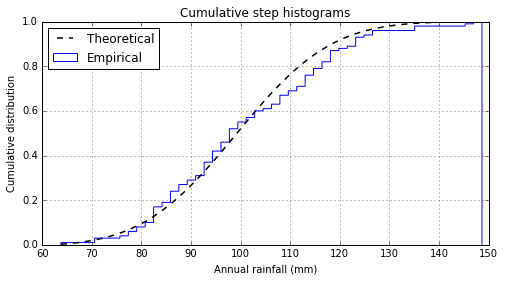

In [9]:
#create random data
np.random.seed(seed)
x = np.random.normal(mu, sigma, size=100)

#setup the plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.grid(True)
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Annual rainfall (mm)')
ax.set_ylabel('Cumulative distribution')

# plot the cumulative histogram
n, bins, patches = ax.hist(x, bins=50, normed=1, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the expected distribution.
y = mpl.mlab.normpdf(bins, mu, sigma).cumsum()
y /= y[-1]
ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

#add a legend
ax.legend(loc=0);

[top](#top)

<a name="heatmap"></a>Heatmaps
---

Heatmaps are a convenient way to plot three dimensional data: we encode two dimensions in space and the thrid dimension as color code.  
Heatmaps are often used to plot confusion matrices (https://en.wikipedia.org/wiki/Confusion_matrix) from classification problems. 
* To plot we use **imshow()** along with a two dimensional numpy array
* To plot the values without any aliasing effects we set ```interpolation``` to 'nearest'.
* We have a wide range of choices of pre-defined colormaps (https://matplotlib.org/examples/color/colormaps_reference.html) but can also define custom colorbars.  

More generally we can use **imshow()** to show any image that consists of pixels.

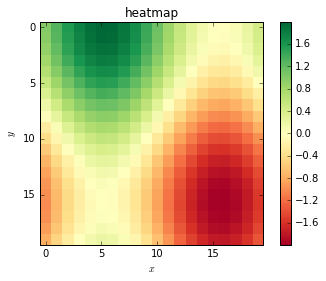

In [10]:
# create some generic data
N = 20
x, y = np.mgrid[:N, :N]
field = (np.cos(x*0.2) + np.sin(y*0.3))

# set up the plot
fig, ax = plt.subplots()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('heatmap')

# plot the data.
# NOTE: here we actually need the positions returned by imshow()
# to create the colorbar
pos = ax.imshow(field, interpolation='nearest',cmap='RdYlGn')
fig.colorbar(pos);

##### NOTE: Saving figures

To save a figure to a file, use the **savefig()** method of the ```figure``` object. The format is choosen automatically, based on the name ending you provide:

In [11]:
# saving as pdf allows for access to all objects separately via a
# vector graphics editor such as inkscape
fig.savefig('sample_figure.pdf')

#when saving as a bitmap, you can choose the resolution
fig.savefig('sample_figure.png', dpi=200)

#check that the files have been created
! ls

03-exploratory-analysis.ipynb	  BMI_male_with_continent.csv~
add-continents-to-BMI-data.ipynb  countryinfo.py
BMI_female.csv			  exercise02-solution.ipynb
BMI_female_with_continent.csv	  __pycache__
BMI_female_with_continent.csv~	  sample_figure.pdf
BMI_male.csv			  sample_figure.png
BMI_male_with_continent.csv


[top](#top)

<a name="exercise01"></a>Exercise 01: Matplotlib
===

1. **Matplotlib**
  1. Explore the 'titanic' dataset using scatterplots and histograms of various variables
  2. Display all plots as subplots in one big figure, make sure the axis labels, titles and legends are right.
  3. (Optional) save the figure as pdf, open it with a vector graphics program (Inkscape) and manipulate the objects created by matplotlib.
  4. Use a heatmap to show the dependency of the probability to survive on the deck and the sex of the passengers.
2. **Lying with plots**
  1. Think about ways to display plots in a misleading way and try them either with the datasets provided in the lecture or with custom datasets. 
  2. Specifically look at 
    * histogram bins
    * axes ranges
    * logarithmic plots

[top](#top)

<a name="seaborn"></a>Sofisticated plotting with Seaborn
===

Seaborn is a visualization library based on matplotlib. Its main features are
* very pleasing and clean default aesthetics
* high level interface for draving of statistical graphics
* extensive collection of plotting functions  
* works seamlessly with pandas dataframes
* as a nice side effect it also offers some simple datasets for testing

By simply importing seaborn, matplotlib automatically changes its default settings (fontsize, background canvas color, not frames) to look very clean. 

Accessing matplotlib via the seaborn API is a good choice for sofisticated graphics like violon plots or joint plots. If you are looking for tight control over every detail in a plot, you should use the matplotlib API.

In [12]:
# previously we used only seaborn's api, now we want to use the 
# nicer default settings seaborn offers too, therefore we need to
# reload the module
import importlib
import seaborn
importlib.reload(seaborn);

<a name="jointplot"></a>Jointplot
---

* The **jointplot()** function offers functionality to plot a scatterplot (bivariate graph) as well as histograms (univariate graph) over both axis.  
* To use seaborn together with a pandas dataframe, we provide the function with the dataframe (in this case ```tips```) along with the labels of the columns we want to use (in this case ```total_bill``` and ```tip```)
* We could also use NumPy arrays for the x and y arguments

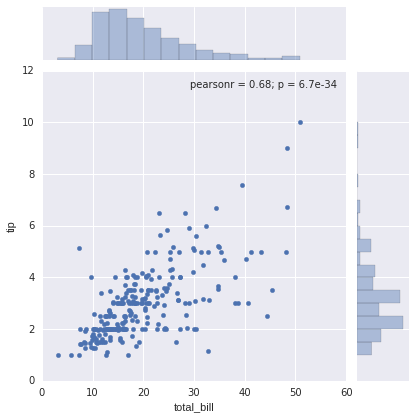

In [13]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="scatter");

[top](#top)

<a name="tsplot"></a>Timeseries plot
---

Timeseries plots are intended to visualize data where 
* different _sampling units_ belonging to the same _observational unit_ were measured
* at different points in time
* and therefore allow a measure for the uncertainty of the observation  

We can use **tsplot()** with a pandas dataframe of a NumPy array. It is important, that the data conforms to the 'tidy' data format, therefore
* each _variable_ forms a column and contains _values_
* each _observation_ forms a row
* each type of _observational unit_ forms a table or has a different _label_.  

In the example below, the variables are
* the timepoint
* the sampling unit ```subject```
* the signal ```BOLD signal```
* the observational unit ```ROI``` (different labels)  

There are 20 observations per timepoint and ROI accross 10 timepoints

In [14]:
# Load the long-form example gammas dataset
gammas = sns.load_dataset("gammas")
gammas.head()

,timepoint,ROI,subject,BOLD signal
0,0.0,IPS,0,0.513433
1,0.0,IPS,1,-0.414368
2,0.0,IPS,2,0.214695
3,0.0,IPS,3,0.814809
4,0.0,IPS,4,-0.894992


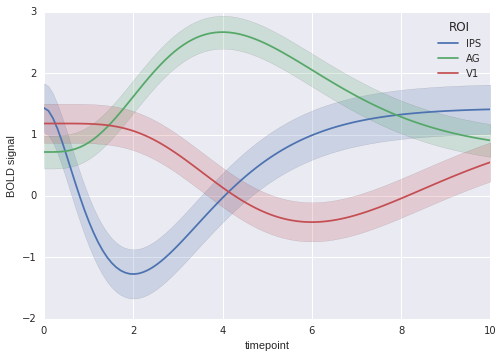

In [15]:
# Plot the response with standard error
sns.tsplot(data=gammas, time="timepoint", unit="subject",
           condition="ROI", value="BOLD signal");

[top](#top)

<a name="categorical"></a>Categorical variables
---

We previously learned how to use plots to visualize the relationship between two variables and how it changes across levels of additional categorical variables. In the example with the tips
* total bill and tip are _numerical variables_
* weekday and time of day are _categorical variables_  

However, what if one of the main variables we are interested in is categorical? Seaborn offers several options for plots of categorical variables
1. plots that show each observation at each level of categorical variable (**swarmplot**)
2. plots that show an abstract representation of each distribution of observations (**violinplot** and **boxplot**)
3. plots that apply a statistical estimation to show a measure of a central tendency & confidence interval (**barplot**)


[top](#top)

<a name="categorical scatterplot"></a>Categorical scatterplot
---

A simple way to show the the values of some quantitative variable across the levels of a categorical variable is to generalize a scatterplot to the case where one of the variables is categorical. This usually results in massive overlapping of the datapoints. Seaborn's **swarmplot** uses an algorithm to minimize the overlap between points.  
In the example below we see
* the _numerical_ variable ```total_bill``` 
* scattered over the _categorical_ variables of four weekdays
* and colored according to the sex of the waiter/waitress

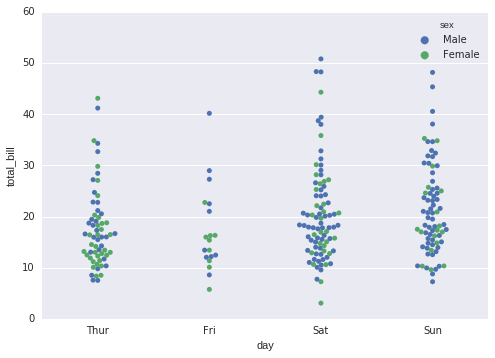

In [15]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

[top](#top)

<a name="distribution"></a>Distributions of observations within categories
---

At a certain point, the categorical scatterplot approach becomes limited in the information it can provide about the distribution of values within each category. There are several ways to summarize this information in ways that facilitate easy comparisons across the category levels.

##### Boxplot / Whisker plot

Boxplots or box-whisker-plots display groups of numerical data through their quartiles (four groups comprising of a quarter of the data each):
* the bottom and top of the box show the first and third quartiles
* the band inside the box shows the second quartile (median)
* the whiskers exten to the lowest and highest value still within 1.5 IQR (https://en.wikipedia.org/wiki/Interquartile_range)
* observations that fall outside this range are displayed as independent points (outliers)

![boxplot](https://www.qualitydigest.com/april05/Images/Features/SPC_F1.jpg)

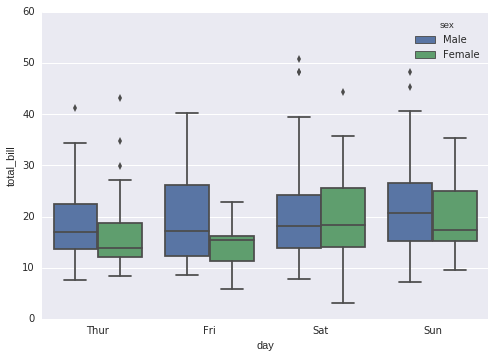

In [16]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips);

##### Violinplot

A different approach to showing numerical data belonging to several categories while keeping an estimate of its distribution is the violinplot. It combines the idea of the boxplot with the _kernel density estimation_ (KDE).  
KDE computes a 'smooth' probability density without the use of a prescribed distribution function and fit parameters. It does so by 
* replacing each observation with a _kernel_ curve (default = gaussian)
* summing up all kernel curves
* normalizing the resulting curve to 1

If we are comparing two populations (like female & male from the 'tips' dataset), we can 'split' the violins to show one KDE on each side of the violin respectively:

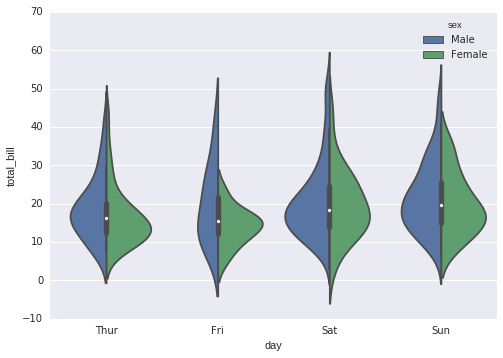

In [16]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, \
               split=True);

[top](#top)

<a name="estimation"></a>Statistical estimation within categories
---

##### Barplot

Often, rather than showing the distribution within each category, we might want to show the central tendency of the values. **barplot** accomplishes that by showing 
* an arbitrary estimate (default is the mean)
* a confidence interval around the estimate using bootstrapping when there are multiple observations in each category  

In the example below, the catgorical variables are
* the sexes ```male``` and ```female``` 
* as well as the class ```first```, ```second``` and ```third```  

The numerical data is the percentage in each category that survived the titanic, the confindence interval is shown as black errorbar. 

In [17]:
# dataset of survivors of the titanica
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


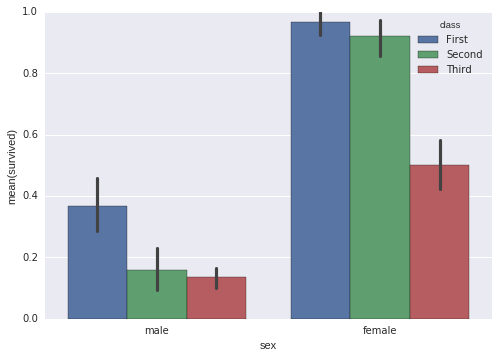

In [18]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

##### Countplot

Similar to a histogram we can also show the data as a **countplot** that is, in essence, a histogram over a categorical rather than a numerical variable.  
With the same titanic data we can show the number of survivors over the deck:

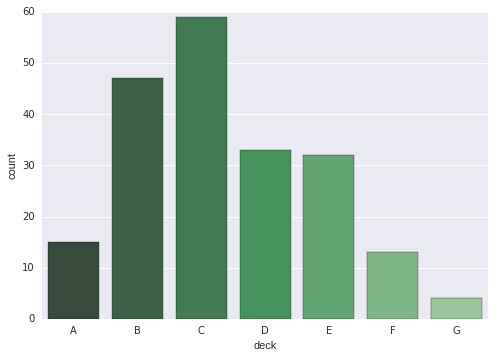

In [19]:
sns.countplot(x="deck", data=titanic, palette="Greens_d");

[top](#top)

<a name="exercise02"></a>Exercise 02: Seaborn
===

1. **Categorical Data** 
  1. Load the timeseries 'BMI_male' and 'BMI_female'  into pandas dataframes. The data contains information about the mean BMI for women and men in 200 countries over a time period from 1980 to 2008.
  2. Tidy up the datasets so 'Time' is a variable (**HINT**: ```pandas.melt()```) 
  3. Create a timeseries plot with the time development of the female BMI  averaging over all countries of a continent.
  4. Show the BMI for men for the different continents at the year 1990 in a swarmplot.
  5. Merge the two datasets into one, introducing the new label 'Sex' to describe the entries from the different datasets.
  6. Plot the BMI for the year 2000 in a whisker plot showing men and women in a different color.
  7. Show the BMIs in a violinplot: 
    * for the year 2000 split between men and women
    * the combined BMIs for men and women split between the years 1980 and 2000.
  8. Show BMIs for the years 1980, 1990 and 2000 in a barplot: 
    * split for the continents 
    * split for the sexes

[top](#top)